Created by Donald E. Brown on 2015-09-12.
Copyright (c) 2015 Donald E. Brown. All rights reserved.

Functions to format and clean the train data files for analysis

# Installation Notes

Download and install the Anaconda scientific python distribution for your operating system

In [1]:
# Install packages using anaconda package manager

conda install matplotlib scikit-learn seaborn

SyntaxError: invalid syntax (<ipython-input-1-e74a7aa51d0d>, line 3)

In [2]:
# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st
from collections import Counter

# Statistics
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment

# Plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

# Check for errors

## Pandas Review

A short review of elements of Pandas

In [4]:
# Series: one dimensional array with index

myseries = pd.Series([1,2,3,4])
print(myseries)
print(myseries.values)
print(myseries.index)
myseries = pd.Series([1,2,3,4], index = ['a','b','c','d'])

0    1
1    2
2    3
3    4
dtype: int64
[1 2 3 4]
Int64Index([0, 1, 2, 3], dtype='int64')


In [5]:
myseries = pd.Series([1,2,3,4], index = ['a','b','c','d'])
print(myseries)
print(myseries.values)
print(myseries.index)

a    1
b    2
c    3
d    4
dtype: int64
[1 2 3 4]
Index(['a', 'b', 'c', 'd'], dtype='object')


In [6]:
# indexing series
myseries[['a', 'b']]*5

a     5
b    10
dtype: int64

In [7]:
myseries2 = pd.Series(range(5), ['a','b','c','d', 'e'])
myseries + myseries2

a     1
b     3
c     5
d     7
e   NaN
dtype: float64

In [8]:
# Data Frames
# two dimensional structure like a spreadsheet
# Structure similar to R

data = {'atom':['H','He','Li'],'num':[1,2,3],'mass':[1.0,4.0,6.9]}
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data,columns=['atom','num','c'],index = ['a', 'b', 'c'])

print(df1)
print(df2)

  atom  mass  num
0    H   1.0    1
1   He   4.0    2
2   Li   6.9    3
  atom  num    c
a    H    1  NaN
b   He    2  NaN
c   Li    3  NaN


In [9]:
# Referencing data frames

print(df1.columns)
print(df1.atom)
print(df1['atom'])
print(df2.ix[1]) # rows
print(df2.ix["c"])
print(df2.iloc[1])
print(df2.loc['c'])

Index(['atom', 'mass', 'num'], dtype='object')
0     H
1    He
2    Li
Name: atom, dtype: object
0     H
1    He
2    Li
Name: atom, dtype: object
atom     He
num       2
c       NaN
Name: b, dtype: object
atom     Li
num       3
c       NaN
Name: c, dtype: object
atom     He
num       2
c       NaN
Name: b, dtype: object
atom     Li
num       3
c       NaN
Name: c, dtype: object


In [10]:
# Adding columns

df2["color"]= ['r', 'g', 'b']
df2

# note: you cannot use df2.color

,atom,num,c,color
a,H,1,NaN,r
b,He,2,NaN,g
c,Li,3,NaN,b


In [11]:
# Deleting columns

del df2['c']
df2

,atom,num,color
a,H,1,r
b,He,2,g
c,Li,3,b


In [12]:
# The data frame array

df2.values

array([['H', 1, 'r'],
       ['He', 2, 'g'],
       ['Li', 3, 'b']], dtype=object)

In [13]:
# Indices and columns are immutable
# use reindex() to create a new object
# with different indices and columns

ser = pd.Series(np.arange(5))
ser2= ser.reindex(['a',4,2,'d','e'])
print(ser)
print(ser2)

0    0
1    1
2    2
3    3
4    4
dtype: int64
a   NaN
4     4
2     2
d   NaN
e   NaN
dtype: float64


In [14]:
# Reindexiing data frames

df3 = pd.DataFrame(np.arange(9).reshape(3,3), index = ['a','c','d'], columns = ['Ohio', 'Texas','California'])
df3

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [15]:
df4 = df3.reindex(['a','b','c','d'])
df4

,Ohio,Texas,California
a,0,1,2
b,NaN,NaN,NaN
c,3,4,5
d,6,7,8


In [16]:
# reindexing columns

states = ['Virginia', 'Texas','California']
df3.reindex(columns = states)

,Virginia,Texas,California
a,NaN,1,2
c,NaN,4,5
d,NaN,7,8


In [17]:
# both rows and columns
df3.reindex(index = ['a','b','c','d'], columns = states, method = 'ffill')

,Virginia,Texas,California
a,NaN,1,2
b,NaN,1,2
c,NaN,4,5
d,NaN,7,8


In [18]:
# Math between series and data frames
aseries = df3.ix[0]
print(df3)
print(aseries)
print(df3 - aseries)

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
Ohio          0
Texas         1
California    2
Name: a, dtype: int64
   Ohio  Texas  California
a     0      0           0
c     3      3           3
d     6      6           6


In [19]:
# Functions applied to data frames
states.append('Oregon')
df3 = pd.DataFrame(np.random.randn(4,3), index = states, columns = list('bde') )
print(df3)
print(np.abs(df3))

                   b         d         e
Virginia    1.133555 -0.634885  1.423285
Texas       0.649817 -0.256793  0.160909
California  0.029092 -1.143908  0.439976
Oregon      0.095727 -1.088169  1.043679
                   b         d         e
Virginia    1.133555  0.634885  1.423285
Texas       0.649817  0.256793  0.160909
California  0.029092  1.143908  0.439976
Oregon      0.095727  1.088169  1.043679


In [20]:
# applying a function to each row or column 

afunction = lambda x: x.max()-x.min()

print(df3.apply(afunction))
print(df3.apply(afunction, axis = 1))

b    1.104464
d    0.887115
e    1.262376
dtype: float64
Virginia      2.058170
Texas         0.906610
California    1.583885
Oregon        2.131847
dtype: float64


In [21]:
# Element-wise function application

format = lambda x: '%.2f' % x
df3.applymap(format)

,b,d,e
Virginia,1.13,-0.63,1.42
Texas,0.65,-0.26,0.16
California,0.03,-1.14,0.44
Oregon,0.10,-1.09,1.04


In [22]:
# Sorting and ranking

aseries = pd.Series(range(4), index = ['b', 'd', 'a', 'c'])
print(aseries)
print(aseries.sort_index())

b    0
d    1
a    2
c    3
dtype: int64
a    2
b    0
c    3
d    1
dtype: int64


In [23]:
# Sorting a data frame

df3 = pd.DataFrame(np.arange(8).reshape(2,4), index = ['Three', 'One'], columns =['b', 'd', 'a', 'c'])
print(df3)
print(df3.sort_index())
print(df3.sort_index(axis =1))
print(df3.sort_index(axis = 1, ascending = False))

       b  d  a  c
Three  0  1  2  3
One    4  5  6  7
       b  d  a  c
One    4  5  6  7
Three  0  1  2  3
       a  b  c  d
Three  2  0  3  1
One    6  4  7  5
       d  c  b  a
Three  1  3  0  2
One    5  7  4  6


In [24]:
df3 = pd.DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})
print(df3)
print(df3.sort_index(by='b'))
print(df3.sort_index(by=['a','b']))

   a  b
0  0  4
1  1  7
2  0 -3
3  1  2
   a  b
2  0 -3
3  1  2
0  0  4
1  1  7
   a  b
2  0 -3
0  0  4
3  1  2
1  1  7


In [25]:
# Ranking

df3['c'] = [8,-2,0,4]
print(df3)
print(df3.rank(axis = 1))

   a  b  c
0  0  4  8
1  1  7 -2
2  0 -3  0
3  1  2  4
     a  b    c
0  1.0  2  3.0
1  2.0  3  1.0
2  2.5  1  2.5
3  1.0  2  3.0


In [26]:
# Missing data
df3 = pd.DataFrame({'b':[4,7,np.nan,2], 'a':[np.nan,1,0,1], 'c':[8,1,-2,3]})
print(df3)
print(df3.fillna(0))
print(df3.fillna({'b':0, 'a':-1}))
print(df3.dropna())
print(df3.dropna(axis = 1))
print(df3.isnull())
print(df3.notnull())

    a   b  c
0 NaN   4  8
1   1   7  1
2   0 NaN -2
3   1   2  3
   a  b  c
0  0  4  8
1  1  7  1
2  0  0 -2
3  1  2  3
   a  b  c
0 -1  4  8
1  1  7  1
2  0  0 -2
3  1  2  3
   a  b  c
1  1  7  1
3  1  2  3
   c
0  8
1  1
2 -2
3  3
       a      b      c
0   True  False  False
1  False  False  False
2  False   True  False
3  False  False  False
       a      b     c
0  False   True  True
1   True   True  True
2   True  False  True
3   True   True  True


In [27]:
# Hierarchical Indexing

aseries=pd.Series(np.random.randn(5),index=[['a','a','b','b','c'],[1,3,5,2,4]])
print(aseries)
print(aseries.index)
print(aseries[0])
print(aseries[2])

a  1   -0.402806
   3    1.604842
b  5   -1.412799
   2   -0.480726
c  4   -0.769234
dtype: float64
MultiIndex(levels=[['a', 'b', 'c'], [1, 2, 3, 4, 5]],
           labels=[[0, 0, 1, 1, 2], [0, 2, 4, 1, 3]])
-0.402805663358
-1.41279897217


In [28]:
# converting to a data fram
aseries.unstack()

,1,2,3,4,5
a,-0.402806,NaN,1.604842,NaN,NaN
b,NaN,-0.480726,NaN,NaN,-1.412799
c,NaN,NaN,NaN,-0.769234,NaN


In [29]:
df3 = pd.DataFrame(np.random.randn(4,3),index=[['a','a','b','b'],[1,1,2,2]],columns=[['alderman','clemons','brown'],['alpha','beta','beta']])
print(df3)
print(df3['alderman'])

     alderman   clemons     brown
        alpha      beta      beta
a 1  1.295392  0.316925  1.159996
  1 -0.600375  0.363204 -0.816051
b 2 -0.459017  0.223087 -1.043007
  2 -0.633744 -0.583404 -1.212920
        alpha
a 1  1.295392
  1 -0.600375
b 2 -0.459017
  2 -0.633744


In [30]:
# Swapping levels

print(df3.swaplevel(0,1))
print(df3.swaplevel(0,1, axis = 1))
print(df3.swaplevel(0,1, axis = 1)['beta'])

     alderman   clemons     brown
        alpha      beta      beta
1 a  1.295392  0.316925  1.159996
  a -0.600375  0.363204 -0.816051
2 b -0.459017  0.223087 -1.043007
  b -0.633744 -0.583404 -1.212920
        alpha      beta          
     alderman   clemons     brown
a 1  1.295392  0.316925  1.159996
  1 -0.600375  0.363204 -0.816051
b 2 -0.459017  0.223087 -1.043007
  2 -0.633744 -0.583404 -1.212920
      clemons     brown
a 1  0.316925  1.159996
  1  0.363204 -0.816051
b 2  0.223087 -1.043007
  2 -0.583404 -1.212920


In [31]:
# statistics on levels
print(df3)
print(df3.sum(level=0))
print(df3.sum(level=1))
print(df3.sum(level=1,axis=1))

     alderman   clemons     brown
        alpha      beta      beta
a 1  1.295392  0.316925  1.159996
  1 -0.600375  0.363204 -0.816051
b 2 -0.459017  0.223087 -1.043007
  2 -0.633744 -0.583404 -1.212920
   alderman   clemons     brown
      alpha      beta      beta
a  0.695016  0.680129  0.343945
b -1.092762 -0.360316 -2.255928
   alderman   clemons     brown
      alpha      beta      beta
1  0.695016  0.680129  0.343945
2 -1.092762 -0.360316 -2.255928
        alpha      beta
a 1  1.295392  1.476921
  1 -0.600375 -0.452847
b 2 -0.459017 -0.819920
  2 -0.633744 -1.796324


## Merging Data Frames


In [32]:
# Data frames for examples

df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],'data1':range(7)})
df2 = pd.DataFrame({'key':['a','b','d','a'],'data2':range(4)})
print(df1)
print(df2)

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
   data2 key
0      0   a
1      1   b
2      2   d
3      3   a


In [33]:
# Example of merging on a key

pd.merge(df1,df2, on = "key")

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,2,a,3
5,4,a,0
6,4,a,3
7,5,a,0
8,5,a,3


In [34]:
# Example merging with different keys,
# left and right

pd.merge(df1,df2,left_on='data1',right_on= 'data2')

,data1,key_x,data2,key_y
0,0,b,0,a
1,1,b,1,b
2,2,a,2,d
3,3,c,3,a


In [35]:
# Union of the keys or outer join

pd.merge(df1,df2,how= 'outer')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,2,a,3
5,4,a,0
6,4,a,3
7,5,a,0
8,5,a,3
9,3,c,NaN


In [36]:
# Merge with indices or rows not variables or columns

pd.merge(df1,df2,left_on='data1',right_index=True)

,data1,key_x,data2,key_y
0,0,b,0,a
1,1,b,1,b
2,2,a,2,d
3,3,c,3,a


In [37]:
# More DF

df3 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],index=['a','c','e'],columns=['Ohio','Nevada'])
df4 = pd.DataFrame([[7.,8.],[9.,10.],[11.,12.],[13.,14.]],index=['b','c','d','e'],columns=['Missouri','Alabama'])
print(df3)
print(df4)

   Ohio  Nevada
a     1       2
c     3       4
e     5       6
   Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14


In [38]:
# join 
# merging by index

df3.join(df4,how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1,2,NaN,NaN
b,NaN,NaN,7,8
c,3,4,9,10
d,NaN,NaN,11,12
e,5,6,13,14


In [39]:
print(df3.join(df4, on = 'Nevada'))

   Ohio  Nevada  Missouri  Alabama
a     1       2       NaN      NaN
c     3       4       NaN      NaN
e     5       6       NaN      NaN


In [40]:
# Concatinating data frames

print(pd.concat([df1,df2]))
print(pd.concat([df1,df2], axis = 1))

   data1  data2 key
0      0    NaN   b
1      1    NaN   b
2      2    NaN   a
3      3    NaN   c
4      4    NaN   a
5      5    NaN   a
6      6    NaN   b
0    NaN      0   a
1    NaN      1   b
2    NaN      2   d
3    NaN      3   a
   data1 key  data2  key
0      0   b      0    a
1      1   b      1    b
2      2   a      2    d
3      3   c      3    a
4      4   a    NaN  NaN
5      5   a    NaN  NaN
6      6   b    NaN  NaN


## Train Accident Data Wrangling



In [41]:
# Function to get the files from a directory

def getallfiles(directory, extension = ".txt"):
    '''Get all files in directory with the specified extension
        and put them into a list.
        The default extension is txt. The input is the path to 
        the directory containing the files.'''
    filenames = os.listdir(directory)
    myfiles = []
    for e in filenames:
        if e.endswith(extension):
            myfiles.append(os.path.realpath(e))
    return myfiles

# Here is an example
# files = getallfiles("/Users/deb/Dropbox/department/Classes/SYS4021/sys 421 2012/data/TrainAccidents/")

In [42]:
def createlist(directory, extension = ".txt"):
    '''Put all files in the specified directory
    with the chosen extension (txt is the default) 
    into a data fame'''
    os.chdir(directory)
    files = getallfiles(directory)
    filelist = []
    for i,file in enumerate(files):
        filelist.append(pd.read_csv(os.path.realpath(file), low_memory = False, encoding = "ISO-8859-1"))
    return(filelist)

In [48]:
# Create the data frame of all accidents
#totacts = createlist("/Users/deb/Dropbox/department/Classes/SYS4021/sys 421 2012/data/TrainAccidents/")
acts = createlist("/Users/RustyRosti/MSDS/Fall/DS_6001/inclass2/data")
totacts = pd.concat(acts, ignore_index = True)
totacts.shape

(46883, 153)

In [49]:
# Variable summaries

totacts[["ACCDMG", "TRNSPD", "TONS", "CARSDMG", "TOTINJ", "TOTKLD"]].describe()

,ACCDMG,TRNSPD,TONS,CARSDMG,TOTINJ,TOTKLD
count,46883.000000,46883.000000,46883.000000,46883.000000,46883.000000,46883.000000
mean,114531.896722,11.525564,3067.775377,0.261758,0.167267,0.016125
std,412469.173466,16.423346,4589.436418,1.212622,5.277546,0.202255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14068.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,26385.000000,5.000000,619.000000,0.000000,0.000000,0.000000
75%,67421.000000,10.000000,4775.000000,0.000000,0.000000,0.000000
max,18100000.000000,150.000000,99000.000000,49.000000,1000.000000,25.000000


In [50]:
# To get individual statistics (e.g. mean, median, var, std, etc.)
print ('Mean: ', totacts[['ACCDMG']].mean())
print ('Median: ', totacts[['ACCDMG']].median())
# another way without the pandas variable indexing
print ('Standard Deviation of ACCDMG: ', totacts.ACCDMG.std())

Mean:  ACCDMG    114531.896722
dtype: float64
Median:  ACCDMG    26385
dtype: float64
Standard Deviation of ACCDMG:  412469.1734664158


(array([  4.64750000e+04,   3.29000000e+02,   3.70000000e+01,
          1.70000000e+01,   1.30000000e+01,   0.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          3.00000000e+00]),
 array([        0.,   1810000.,   3620000.,   5430000.,   7240000.,
          9050000.,  10860000.,  12670000.,  14480000.,  16290000.,
         18100000.]),
 <a list of 10 Patch objects>)

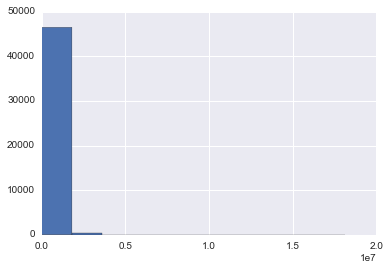

In [51]:
plt.hist(totacts.ACCDMG)

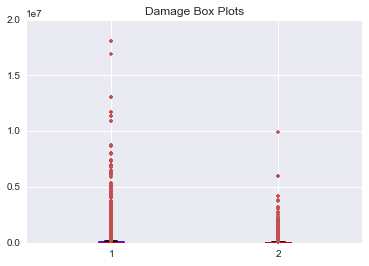

In [52]:
plt.boxplot([totacts.ACCDMG, totacts.TRKDMG], 0, "r.")
plt.title("Damage Box Plots")

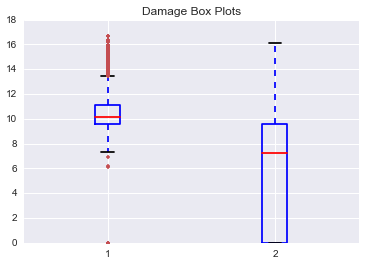

In [53]:
plt.boxplot([np.log(totacts.ACCDMG+1), np.log(totacts.TRKDMG+1)], 0, "r.")
plt.title("Damage Box Plots")

{'boxes': [<matplotlib.lines.Line2D at 0x1103306d8>],
 'caps': [<matplotlib.lines.Line2D at 0x110338a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x110341240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11033ca20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1103309b0>,
  <matplotlib.lines.Line2D at 0x110338240>]}

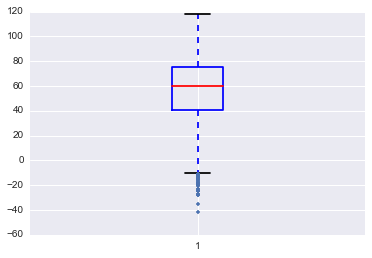

In [54]:
plt.boxplot(totacts.TEMP, 0, sym = "b.")

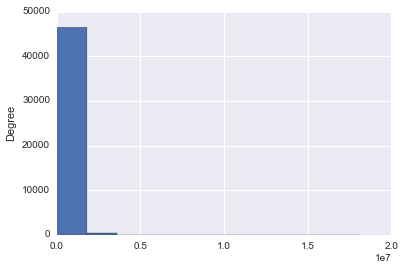

In [55]:
totacts.ACCDMG.plot(kind="hist")

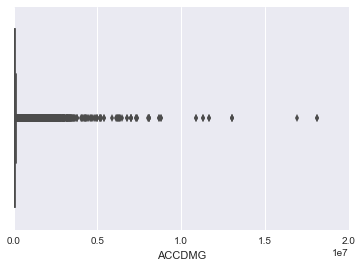

In [56]:
# Analyze accident cost column
sns.boxplot(x=totacts.ACCDMG)

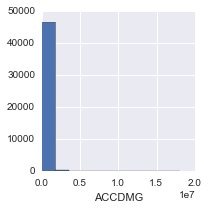

In [57]:
g = sns.FacetGrid(totacts)
g.map(plt.hist, "ACCDMG")

In [58]:
# Look at 3 approaches to removing duplicates
#Removing duplicates

totactsClean = totacts.drop_duplicates(["YEAR", "DAY","MONTH", "TIMEHR"])
print(totactsClean.shape)

# using AMPM
totactsClean = totacts.drop_duplicates(["YEAR", "DAY","MONTH", "TIMEHR", "AMPM"])
print(totactsClean.shape)

# Using the FRA FAQ `b
# http://safetydata.fra.dot.gov/officeofsafety/Documents/Railroad%20Safety%20Data%20Frequently%20Asked%20Questions.pdf?V=9
totactsClean = totacts[(totacts['JOINTCD'] == 1) & (totacts['TYPE'] != 7)]
print(totactsClean.shape)

(27585, 153)
(32014, 153)
(34626, 153)


In [59]:
# Extreme accidents
totactsClean.ix[(totactsClean.ACCDMG > 1.5e7),["ACCDMG","YEAR"]]

,ACCDMG,YEAR
1428,16930000,1
42881,18100000,13


In [60]:
# Index for the 9/11/2001 accident
nine11idx = totactsClean.ix[(totactsClean.ACCDMG > 1.5e7) & (totactsClean.YEAR == 1), ["ACCDMG"]].index[0]
nine11idx

1428

In [61]:
# The 9/11 Narrative

print(totacts.NARR1[nine11idx])
print(totacts.NARR2[nine11idx])
print(totacts.NARR3[nine11idx])
print(totacts.NARR4[nine11idx])
print(totacts.NARR5[nine11idx])
print(totacts.NARR6[nine11idx])
print(totacts.NARR7[nine11idx])
print(totacts.NARR8[nine11idx])
print(totacts.NARR9[nine11idx])
print(totacts.NARR10[nine11idx])
print(totacts.NARR11[nine11idx])
print(totacts.NARR12[nine11idx])
print(totacts.NARR13[nine11idx])
print(totacts.NARR14[nine11idx])
print(totacts.NARR15[nine11idx])

AT APPROXIMATELY 8:48 AM, PATH POLICE COMMAND WAS NOTIFIED THAT A PLANE STRUCK THE WORLD TRADE CENTE
R.  AT 8:52 AM TRAIN SERVICE WAS SUSPENDED INTO THE WORLD TRADE CENTER.  ALL PATH EMPLOYEES WERE NOT
IFIED BY PHONE TO EVACUATE.  ALL REMAINING EMPLOYEES WERE EVACUATED ON A TRAIN THAT DEPARTED THE STA
TION AT 9:11 AM.  THE CREW ON THE HOB46 ARRIVING AT WTC WAS INSTRUCTED TO KEEP THE DOORS CLOSED AND
OPERATE THROUGH THE WTC WITHOUT STOPPING.  THESE PASSENGERS WERE RE-ROUTED TO 33RD STREET.  AT 9:02
AM THE PATH EMERGENCY OPERATIONS PLAN WAS PUT INTO EFFECT AND REMAINING SERVICE OPERATED ON A 10 MIN
UTE SCHEDULE. AT 10:45 AM PASSENGER TRAIN OPERATIONS WERE SUSPENDED AS A RESULT OF CONCERNS FOR PUBL
IC SAFETY.  BOTH TOWERS FELL CAUSING DEBRIS TO FALL INTO THE STATION AND ON A TRAIN LOCATED ON TRACK
3 AT WORLD TRADE CENTER.  CARS IN CONSIST WERE: 612-139-750-731-160-143-745.  FLOODING OCCURRED AND
WATER FLOWED AS FAR AS EXCHANGE PLACE STATION IN JERSEY CITY.  MAINTENANCE PERSONNEL WORKED RO

In [62]:
# Look at damage and casualties on 9/11

totactsClean.ix[(totactsClean.ACCDMG > 1.5e7) & (totactsClean.YEAR == 1), ["ACCDMG", "TOTKLD", "TOTINJ"]]

,ACCDMG,TOTKLD,TOTINJ
1428,16930000,0,16


In [63]:
# Drop 9/11/2001 accident from totactsClean
# Then check that it has been removed

totactsClean = totactsClean.drop(nine11idx)
totactsClean.ix[(totactsClean.ACCDMG > 1.5e7),["ACCDMG","YEAR"]]

,ACCDMG,YEAR
42881,18100000,13


In [64]:
# Check for missing data
pd.isnull(totacts).any()

ACCAUSE     False
ACCDMG      False
ACCTRK       True
ACCTRKCL     True
ADJUNCT1     True
ADJUNCT2     True
ADJUNCT3     True
ALCOHOL      True
AMPM         True
AMTRAK       True
BRAKEMEN     True
CABOOSE1    False
CABOOSE2    False
CARNBR1      True
CARNBR2      True
CARS        False
CARSDMG     False
CARSHZD     False
CASINJ      False
CASINJRR    False
CASKLD      False
CASKLDRR    False
CAUSE       False
CAUSE2       True
CDTRHR       True
CDTRMIN      True
CNTYCD       True
CONDUCTR     True
COUNTY      False
CauseCat     True
            ...  
STCNTY       True
SUBDIV       True
TEMP        False
TIMEHR      False
TIMEMIN     False
TONS        False
TOTINJ      False
TOTKLD      False
TRKCLAS      True
TRKDMG      False
TRKDNSTY     True
TRKNAME      True
TRNDIR       True
TRNNBR       True
TRNSPD      False
TYPE        False
TYPEQ        True
TYPRR        True
TYPSPD       True
TYPTRK       True
VISIBLTY    False
WEATHER     False
YEAR        False
YEAR4       False
adjunct1  

In [65]:
# Keeping the narratives

narnames = []
for i in range(1,16):
    narnames.append("NARR" + str(i))   
print(narnames)

totactsNarr = totactsClean[narnames]
print(totactsNarr.shape)

#How many missing values?
print(totactsClean[narnames].isnull().sum())

['NARR1', 'NARR2', 'NARR3', 'NARR4', 'NARR5', 'NARR6', 'NARR7', 'NARR8', 'NARR9', 'NARR10', 'NARR11', 'NARR12', 'NARR13', 'NARR14', 'NARR15']
(34625, 15)
NARR1         2
NARR2      5719
NARR3     20432
NARR4     27881
NARR5     31179
NARR6     32757
NARR7     33495
NARR8     33884
NARR9     34096
NARR10    34232
NARR11    34322
NARR12    34393
NARR13    34429
NARR14    34465
NARR15    34491
dtype: int64


In [66]:
# Join the narratives for each accident
# into one document. Then put all the documents
# into a list.

# Creating a list of narratives by combining 
# the narrative fields

Narratives = []
for i, _ in enumerate(totactsNarr["NARR1"]):
    NarrativeList = totactsNarr.iloc[i]
    Anarrative = ""
    for narr in NarrativeList:
        if pd.isnull(narr):
            break
        else:
            Anarrative += str(narr)
    Narratives.append(Anarrative)
    
Narratives[0:5] # showing the first 5

['UNITS 231-281(BACK TO BACK)  WERE COMING INTO UP DEISEL SHOP  WHEN THE LEFT WHEEL OF 281 RODE OVER RECENTLY REPAIRED SWITCH PLATE AND DERAILED. THE CAUSE WAS DETERMINED TO BE THE TRACK TELEMETRY IN THAT IT WAS TOO SHARP OF A CURVE.',
 'ENGINE 286 CAUGHT FIRE AT THE SPRINGFIELD, MA STATION DUE TO BEARINGS IN MAIN GENERATOR LET GO.',
 'TRAIN NO.#4 WITH ENGS 83/11/90/44 AND 11 CARS DERAILED 2 DEADHEAD CARS, C/44834 AND C/9639, WHILE MAKING A SHOVING MOVE ONTO TRACK 28.  THE DERAILMENT WAS DUE TO HIGH BUFF FORCES CAUSED JACKKNIFING OFDEADHEADING AMFLEET CAR 44834 LOCATED DIRECTLY BEHIND ENGINES DUE TO EXCESSIVE AMPERAGE GENERATED BY FOUR P42 LOCOMOTIVES SHOVING TRAIN AGAINST AN APPROXIMATELY 15-POUND BRAKE REDUCTION.',
 'WHILE SHOVING TRAIN 624 SOUTH ON #30 TRACK AT PENN COACH YARD, CONDUCTOR FAILED TO STOP FOR A DERAILAND 2 CARS DERAILED .',
 'TRAIN 786 WAS STRUCK BY A FALLING TREE SOUTH OF SANTA BARBARA, CA.']

In [67]:
# Remove variables with missing data
# But keep TYPEQ - type of train
# ACCTRKCL and AMPM

typeq = totactsClean['TYPEQ']
acctrkcl = totactsClean.ACCTRKCL
ampm = totactsClean.AMPM

# How many missing values?
totacts[["AMPM", "TYPEQ", "ACCTRKCL"]].isnull().sum()

AMPM           7
TYPEQ       3139
ACCTRKCL     138
dtype: int64

In [68]:
# Removing columns with NA
totactsClean = totactsClean.dropna(axis=1)
totactsClean.shape

(34625, 70)

In [69]:
# Adding back TYPEQ, ACCTRKCL, AMPM

totactsClean['TYPEQ'] = typeq
totactsClean['ACCTRKCL'] = acctrkcl
totactsClean['AMPM'] = ampm
totactsClean.shape

(34625, 73)

In [70]:
# fill the NA for TYPEQ

Counter(totactsClean.TYPEQ.fillna(np.nan))

Counter({nan: 1289,
         1.0: 2727,
         2.0: 225,
         3.0: 59,
         4.0: 32,
         5.0: 136,
         6.0: 242,
         7.0: 1842,
         8.0: 218,
         9.0: 58,
         '4': 191,
         '3': 283,
         '6': 1552,
         'B': 12,
         '9': 164,
         'E': 16,
         '2': 882,
         '1': 12365,
         '7': 9963,
         '5': 793,
         'D': 49,
         'A': 237,
         'C': 23,
         '8': 1267})

In [71]:
# Mapping for TYPEQ
map_typeq = {1:"Freight", 2: "Passenger", 3:"Commuter", 4: "Work",  5: "Single", 
             6: "CutofCars", 7: "Yard", 8:"Light", 9: "Maint", 'A': "Maint of Way",
            '1': "Freight", '2': "Passenger", '3': "Commuter", '4':"Work", '5': "Single",
             '6':"CutofCars", '7':"Yard", '8':"Light", '9':"Maint", "B": "B", "C":"C",
             "D":"D", "E":"E"}
totactsClean['TYPEQ'] = totactsClean['TYPEQ'].map(map_typeq)
Counter(totactsClean["TYPEQ"])

Counter({nan: 1289,
         'Yard': 11805,
         'B': 12,
         'Work': 223,
         'Passenger': 1107,
         'Maint of Way': 237,
         'CutofCars': 1794,
         'Commuter': 342,
         'Light': 1485,
         'D': 49,
         'Freight': 15092,
         'Single': 929,
         'Maint': 222,
         'C': 23,
         'E': 16})

In [72]:
# Levels for TYPE
Counter(totactsClean["TYPE"])

Counter({1: 24935,
         2: 115,
         3: 279,
         4: 1488,
         5: 641,
         6: 75,
         8: 3,
         9: 861,
         10: 13,
         11: 334,
         12: 4024,
         13: 1857})

In [74]:
# Replacing values TYPE 
totactsClean['TYPE']= totactsClean['TYPE'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
                                         ["Derailment", "HeadOn", "Rearend", "Side", "Raking", 
                                          "BrokenTrain", "Hwy-Rail", "GradeX", "Obstruction", 
                                          "Explosive", "Fire","Other","SeeNarrative"])
Counter(totactsClean['TYPE'])

Counter({'BrokenTrain': 75,
         'Derailment': 24935,
         'Explosive': 13,
         'Fire': 334,
         'GradeX': 3,
         'HeadOn': 115,
         'Obstruction': 861,
         'Other': 4024,
         'Raking': 641,
         'Rearend': 279,
         'SeeNarrative': 1857,
         'Side': 1488})

In [75]:
# Replacing CAUSE with the first letter

totactsClean.CAUSE = totactsClean.CAUSE.apply(lambda x: x[0])
Counter(totactsClean.CAUSE)

Counter({'E': 4335, 'H': 12961, 'M': 4916, 'S': 726, 'T': 11687})

In [76]:
# Inflation adjustment suggested by D. Rogers
# Add column to adjust ACCDMG for inflation
# Using adjustments from http://data.bls.gov/cgi-bin/cpicalc.pl

inflation_mult_2000_to_2015_USD = \
    [1.39, 1.35, 1.33, 1.30, 1.26, 1.22, 1.18, 1.15, 1.11, 1.11, 1.09, 1.06, 1.04, 1.02, 1.01, 1]

# Define a function to do this for us
def adj_inflation(row):
    cost_year = int(row['YEAR'])
    return row['ACCDMG'] * inflation_mult_2000_to_2015_USD[cost_year]

# Apply inflation adjustment to ACCDMG 
totactsClean.loc[:,'ACCDMG2015'] = totactsClean[['ACCDMG', 'YEAR']].apply(adj_inflation, axis=1)

In [77]:
# Check the maximum inflation adjusted difference
print ((totactsClean.ACCDMG2015 - totactsClean.ACCDMG).max())
print ((totactsClean.ACCDMG2015 - totactsClean.ACCDMG).mean())

# Nearly 3 million dollar difference in one case!
# On average, $~19K difference.

2864466.0
19017.116486353545


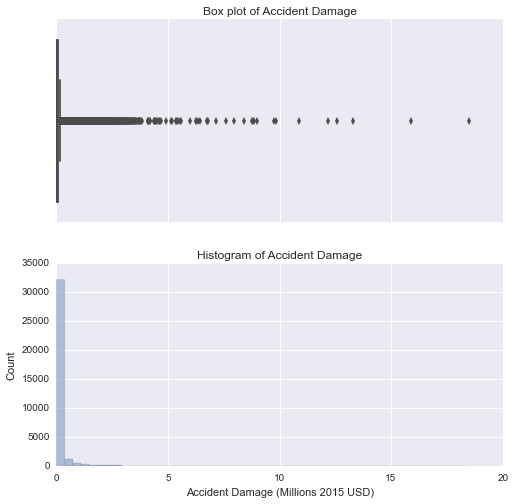

In [78]:
# Plot the inflation adjusted numbers
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8,8))

# Box plot
accdmg_boxplot = sns.boxplot(x=totactsClean.ACCDMG2015.apply(lambda x: x/1e6), ax=ax1)
accdmg_boxplot.set_title('Box plot of Accident Damage')
accdmg_boxplot.set_xlabel('')

# Histogram
accdmg_hist = sns.distplot(totactsClean.ACCDMG2015.apply(lambda x: x/1e6), kde=False, ax=ax2)
accdmg_hist.set_title('Histogram of Accident Damage')
accdmg_hist.set_xlabel('Accident Damage (Millions 2015 USD)')
accdmg_hist.set_ylabel('Count')

# Notice distribution spread to the right a bit more, but still the vast majority of accidents
# reported are much less than a million

### Aggregating Data

In [79]:
dmgbyType = totactsClean['ACCDMG'].groupby(totactsClean['TYPE'])
print(dmgbyType.max())
print(dmgbyType.sum())
print(dmgbyType.size())

TYPE
BrokenTrain      3626762
Derailment      18100000
Explosive        1035470
Fire             2500000
GradeX           7301127
HeadOn          11677867
Obstruction     13020300
Other            3000000
Raking           2041199
Rearend          8063350
SeeNarrative     6108000
Side             8686769
Name: ACCDMG, dtype: float64
TYPE
BrokenTrain       10038635
Derailment      3191090195
Explosive          1383252
Fire              44587488
GradeX             7504301
HeadOn            94589352
Obstruction       67881677
Other            160079012
Raking            35496735
Rearend           93693892
SeeNarrative      90711272
Side             161064932
Name: ACCDMG, dtype: float64
TYPE
BrokenTrain        75
Derailment      24935
Explosive          13
Fire              334
GradeX              3
HeadOn            115
Obstruction       861
Other            4024
Raking            641
Rearend           279
SeeNarrative     1857
Side             1488
dtype: int64


In [137]:
#Develop python code that can be used to answer the following questions.
print("(a) How many accidents occurred from 2001 to 2014?")
print(totactsClean.shape[0])
print("(b) What is the total cost of train accidents?")
print("Raw      $%13.2f" %sum(totactsClean['ACCDMG']))
print("Adjusted $%13.2f" % sum(totactsClean['ACCDMG2015']))
print("(c) What is the average cost of accidents?")
print("$%14.2f" %totactsClean['ACCDMG2015'].mean())
print("(d) What is the average annual cost?")
for i in range(1,15):
    print("for year %2i: $%6.2f" % (i,totactsClean['ACCDMG2015'].where(totactsClean['YEAR']== i).mean()))
print("(e) What is the total number killed in all accidents from 2001 to 2014?")
print(totactsClean["TOTKLD"].sum())
print("(f) What is the maximum number killed in a single accident?")
print(totactsClean["TOTKLD"].max())
print("(g) What is the average number of people killed per year?")
for i in range(1,15):
    print("for year %2i: %f" % (i,totactsClean['TOTKLD'].where(totactsClean['YEAR']==i).mean()))
print("(h) What is the total number injured in all accidents from 2001 to 2014?")
print(totactsClean["TOTINJ"].sum())
print("(i) What is the average number of people injured per year?")
for i in range(1,15):
    print("for year %2i: %f" % (i,totactsClean['TOTINJ'].where(totactsClean['YEAR']==i).mean()))
print("(j) What is the count of the different types of variables in the total data")
print(Counter(totactsClean.dtypes))
#set? I.E., float64, int64, and object.

(a) How many accidents occurred from 2001 to 2014?
34625
(b) What is the total cost of train accidents?
Raw      $3958120743.00
Adjusted $4616588401.34
(c) What is the average cost of accidents?
$     133331.07
(d) What is the average annual cost?
for year  1: $132916.23
for year  2: $129537.56
for year  3: $128435.69
for year  4: $121326.16
for year  5: $126957.49
for year  6: $126959.66
for year  7: $135182.63
for year  8: $131794.78
for year  9: $132665.08
for year 10: $146647.68
for year 11: $130349.90
for year 12: $134756.50
for year 13: $171648.07
for year 14: $142596.44
(e) What is the total number killed in all accidents from 2001 to 2014?
101.0
(f) What is the maximum number killed in a single accident?
9.0
(g) What is the average number of people killed per year?
for year  1: 0.000993
for year  2: 0.004383
for year  3: 0.001325
for year  4: 0.002068
for year  5: 0.006736
for year  6: 0.002001
for year  7: 0.002599
for year  8: 0.000821
for year  9: 0.002103
for year 10: 0.003